Alunos:

- Bruno Santos (bfss@cesar.school)
- Caio Guedes (ccsg@cesar.school)

### **Redes Neurais Recorrentes (RNNs)**

As Redes Neurais Recorrentes (RNNs) são um tipo de rede neural projetada para processar sequências de dados, como séries temporais ou textos. A principal característica das RNNs é a capacidade de manter um estado interno que captura informações sobre as entradas anteriores, permitindo que a rede tenha "memória" dos passos anteriores na sequência.

A cada passo de tempo $t$, a RNN atualiza seu estado oculto $h_t$ com base na entrada atual $x_t$ e no estado oculto anterior $h_{t-1}$:

$$
h_t = \tanh(W_{ih} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h)
$$

Aqui:
- $W_{ih}$ é a matriz de pesos que conecta a entrada ao estado oculto.
- $W_{hh}$ é a matriz de pesos que conecta o estado oculto anterior ao atual.
- $b_h$ é o termo de bias.
- $\tanh$ é a função de ativação que introduz não-linearidade.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

### **Implementação de uma Célula RNN**

Nesta seção, implementaremos uma célula RNN personalizada usando o PyTorch. A célula RNN é a unidade básica de uma RNN, responsável por calcular o novo estado oculto com base na entrada atual e no estado oculto anterior.

#### **Explicação do Código**

O código a seguir define uma célula RNN personalizada:

- **Entrada:** O tamanho da entrada `input_size` e o tamanho do estado oculto `hidden_size`.
- **Pesos:** $ W_{ih} $ e $ W_{hh} $ são as matrizes de pesos, e $ b_h $ é o bias.
- **Saída:** A célula computa o novo estado oculto $ h_t $ a partir da entrada e do estado oculto anterior.

In [ ]:
class RNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.W_ih = nn.Linear(input_size, hidden_size, bias=False) # Define a matriz de pesos de entrada
        self.W_hh = nn.Linear(hidden_size, hidden_size, bias=False) # Define a matriz de pesos de saída
        self.b_h = nn.Parameter(torch.zeros(hidden_size)) # Define o bias

    def forward(self, x, h):
        # x: (batch_size, input_size)
        # h: (batch_size, hidden_size)
        ht = torch.tanh(self.W_ih(x) + self.W_hh(h) + self.b_h)
        return ht

### **Exemplo de Uso da Célula RNN**

Inicialmente, definimos uma célula RNN com um tamanho de entrada de 10 e um tamanho de estado oculto de 4.

In [ ]:
# Exemplo
input_size = 10
hidden_size = 4

rnn_cell = RNNCell(input_size, hidden_size)

### **Inspeção dos Parâmetros da Célula RNN**

Neste trecho de código, vamos inspecionar os parâmetros da célula RNN que acabamos de definir. Em uma rede neural, os parâmetros são os valores ajustáveis (como os pesos e bias) que a rede aprende durante o treinamento.

Ao executar o código, veremos os nomes e as formas dos parâmetros:

- **`W_ih`**: Matriz de pesos conectando a entrada ao estado oculto.
- **`W_hh`**: Matriz de pesos conectando o estado oculto anterior ao atual.
- **`b_h`**: Termo de bias para o estado oculto.

In [ ]:
for name, param in rnn_cell.named_parameters():
    print(name, param.shape)

b_h torch.Size([4])
W_ih.weight torch.Size([4, 10])
W_hh.weight torch.Size([4, 4])


#### **Explicação do Código**

No exemplo abaixo:
- Inicializamos uma entrada $x$ aleatória e um estado oculto inicial $h$ como zero.
- A célula RNN processa a entrada e gera um novo estado oculto.

In [ ]:
x = torch.randn(input_size)
h = torch.zeros(hidden_size)

hn = rnn_cell(x, h)

hn.shape

torch.Size([4])

### **Processamento de Sequências com RNN**

RNNs são projetadas para processar sequências de dados, onde cada passo de tempo depende dos passos anteriores. Vamos demonstrar isso processando uma sequência de entradas com a célula RNN.

#### **Explicação do Código**

Neste exemplo:
- Processamos uma sequência de 3 entradas $x$ e atualizamos o estado oculto $h$ a cada passo.
- O estado oculto é propagado ao longo da sequência, capturando informações temporais.

In [ ]:
# Sequences
seq_len = 3

x = torch.randn(seq_len, input_size)
h = torch.zeros(hidden_size)

# Para cada instante de tempo
for i in range(seq_len):
    # Atualiza o estado oculto
    h = rnn_cell(x[i], h)
    print(f"Passo {i+1}")
    print(f"h = {h}")
    print()

Passo 1
h = tensor([-0.4622,  0.8977,  0.4114,  0.7458], grad_fn=<TanhBackward0>)

Passo 2
h = tensor([0.7707, 0.8651, 0.7472, 0.4091], grad_fn=<TanhBackward0>)

Passo 3
h = tensor([ 0.8654,  0.5326, -0.1719,  0.8417], grad_fn=<TanhBackward0>)



### **Processamento de Sequências em Lote (Batched RNN)**

Para aumentar a eficiência, as RNNs podem processar várias sequências simultaneamente, usando o conceito de "batching". Cada sequência no lote é processada de forma independente, mas compartilhando os mesmos pesos da RNN.

#### **Explicação do Código**

Neste exemplo:
- Criamos um batch de 8 sequências, cada uma com 10 entradas.
- A célula RNN é aplicada ao batch, atualizando o estado oculto para cada sequência de forma paralela.

In [ ]:
# Batched RNN
batch_size = 8

x = torch.randn(batch_size, input_size)
h = torch.zeros(batch_size, hidden_size)

hn = rnn_cell(x, h)

hn.shape

torch.Size([8, 4])

### **Processamento de Sequências em Lote com Múltiplos Passos de Tempo**

Aqui, processamos um batch de sequências ao longo de vários passos de tempo.

#### **Explicação do Código**

Neste exemplo:
- Processamos um lote de 8 sequências, cada uma com 3 passos de tempo.
- Em cada passo de tempo, a célula RNN atualiza o estado oculto para todas as sequências do lote.

In [ ]:
# Sequences
seq_len = 3

x = torch.randn(batch_size, seq_len, input_size)
h = torch.zeros(batch_size, hidden_size)

# Para cada instante de tempo
for i in range(seq_len):
    # Atualiza o estado oculto
    h = rnn_cell(x[:, i], h)
    print(f"Passo {i}")
    print(f"h = {h.shape}")
    print()

Passo 0
h = torch.Size([8, 4])

Passo 1
h = torch.Size([8, 4])

Passo 2
h = torch.Size([8, 4])



### **Construção de uma Rede RNN Completa**

Vamos expandir a célula RNN que criamos anteriormente para uma rede RNN completa. A rede RNN será composta por uma célula RNN seguida por uma camada linear que produzirá a saída final.

#### **Explicação do Código**

- **`self.cell`**: Instância da célula RNN que processará cada passo da sequência.
- **`self.W_ho`**: Camada linear que mapeia o estado oculto final para a saída desejada.

No método `forward`:
- **Entrada (`x`)**: Um tensor de forma `(batch_size, seq_len, input_size)`, onde `seq_len` é o comprimento da sequência.
- **Estado oculto (`h`)**: Se não for fornecido, é inicializado como um vetor de zeros.
- **Processamento da sequência**: A entrada é processada passo a passo pela célula RNN.
- **Saída (`y`)**: Calculada pela camada linear a partir do estado oculto final.

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.cell = RNNCell(input_size, hidden_size) # Define a célula RNN
        self.W_ho = nn.Linear(hidden_size, output_size) # Define a matriz de pesos de saída

    def forward(self, x, h=None):
        # x: (batch_size, seq_len, input_size)
        batch_size, seq_len, _ = x.size()

        # h: (batch_size, hidden_size)
        if h is None:
            h = torch.zeros(batch_size, self.hidden_size)
        h = h.to(x.device)

        # Processa a sequência
        for i in range(seq_len):
            h = self.cell(x[:, i], h)

        # Calcula a saída
        y = self.W_ho(h)
        return y

### **Geração de Dados para Treinamento**

Para treinar a RNN, precisamos de um conjunto de dados sequenciais. Neste exemplo, geramos uma série temporal baseada em uma função senoide com ruído adicionado.

#### **Explicação do Código**

- **`x`**: Sequência de pontos no intervalo $[0, 6\pi]$.
- **`y`**: Valores da função senoide com ruído gaussiano adicionado.

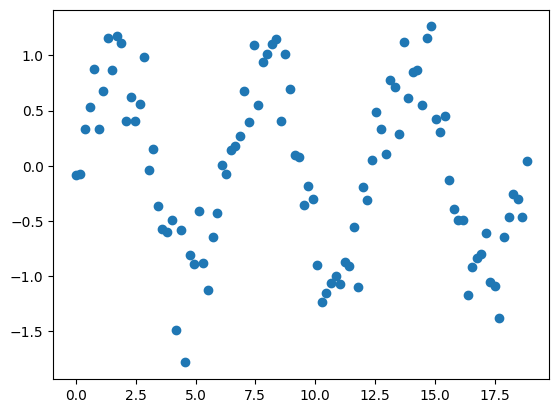

In [ ]:
num_points = 100

x = np.linspace(0, 6*np.pi, num_points)
y = np.sin(x) + np.random.normal(0, 0.3, num_points)

plt.scatter(x, y)
plt.show()

### **Preparação das Sequências de Treinamento**

Agora, preparamos as entradas e as saídas alvo para o treinamento da RNN. Cada sequência de entrada será usada para prever o próximo ponto na série temporal.

#### **Explicação do Código**

- **`sequence_length`**: O comprimento da janela da sequência usada como entrada.
- **`inputs`**: Sequências de tamanho `sequence_length` extraídas dos dados.
- **`targets`**: O ponto subsequente na sequência que a rede deve prever.
- **Tensorização**: As sequências são convertidas em tensores PyTorch para uso na rede neural.

In [ ]:
sequence_length = 20
batch_size = num_points - sequence_length
inputs = []
targets = []

for i in range(num_points - sequence_length):
    inputs.append(y[i:i+sequence_length])
    targets.append(y[i+sequence_length])

inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)
targets = torch.tensor(targets, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, 1)

<ipython-input-11-a31d50ca37e9>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)


### **Inicialização da Rede RNN e do Otimizador**

Nesta seção, instanciamos a rede RNN com os tamanhos de entrada, estado oculto, e saída definidos. Também configuramos o critério de perda e o otimizador.

#### **Explicação do Código**

- **`input_size`**: Dimensão da entrada (1, já que estamos lidando com uma série temporal univariada).
- **`hidden_size`**: Número de unidades no estado oculto.
- **`output_size`**: Dimensão da saída (1, pois queremos prever um único valor por vez).

In [ ]:
input_size = 1
hidden_size = 8
output_size = 1

rnn = RNN(input_size, hidden_size, output_size)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.01)

In [ ]:
# Treinamento
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = rnn(inputs)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.6888659596443176
Epoch 50, Loss: 0.12926085293293
Epoch 100, Loss: 0.11999763548374176
Epoch 150, Loss: 0.07921518385410309
Epoch 200, Loss: 0.06589920818805695
Epoch 250, Loss: 0.06179531291127205
Epoch 300, Loss: 0.058945246040821075
Epoch 350, Loss: 0.05631517246365547
Epoch 400, Loss: 0.053248077630996704
Epoch 450, Loss: 0.05153835564851761


### **Geração de Predições com a Rede Treinada**

Após o treinamento, usamos a RNN para gerar previsões de uma nova série temporal. A ideia é prever a continuação da senoide a partir de uma sequência inicial.

#### **Explicação do Código**

- **`predicted_wave`**: Lista para armazenar as predições feitas pela RNN.
- **`input_seq`**: Sequência inicial usada para começar a predição.
- **Passos de predição**:
  - A cada passo, a rede faz uma nova predição que é adicionada à sequência de entrada.
  - A janela de entrada é atualizada para incluir a nova predição e excluir o ponto mais antigo.

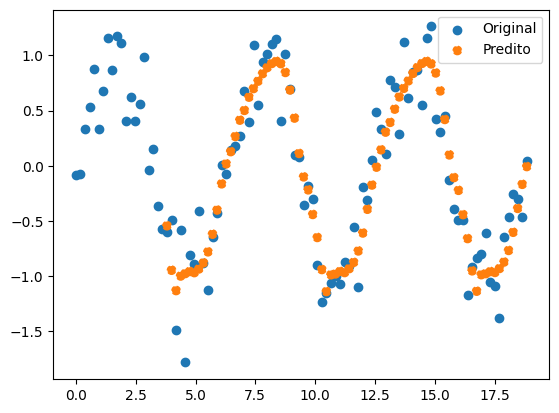

In [ ]:
# Gerando predições para uma senoide
predicted_wave = []

input_seq = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq = torch.tensor(input_seq, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next = rnn(input_seq)
    predicted_wave.append(predicted_next.item())

    # Arrasta a janela de entrada
    predicted_next = predicted_next.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq = torch.cat([input_seq[:, 1:, :], predicted_next], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
plt.scatter(x[sequence_length:], predicted_wave, label='Predito', linestyle='dashed')
plt.legend()
plt.show()

## **Exercícios**

### **Exercício 1: Aumentando o Tamanho do Estado Oculto**

1. Aumente o tamanho do estado oculto (`hidden_size`) na rede RNN.
2. Treine a rede novamente com os mesmos dados de entrada.
3. Compare a perda final e as predições da rede com o modelo original.
4. Pergunta: Como o aumento do tamanho do estado oculto afetou o desempenho da rede?

1. Aumente o tamanho do estado oculto (hidden_size) na rede RNN.

In [ ]:
hidden_size_plus = 16

rnn_exerc_1 = RNN(input_size, hidden_size_plus, output_size)

2. Treine a rede novamente com os mesmos dados de entrada.

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn_exerc_1.parameters(), lr=0.01)

In [ ]:
# Treinamento
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = rnn_exerc_1(inputs)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 1.0011329650878906
Epoch 50, Loss: 0.11380960047245026
Epoch 100, Loss: 0.06751935184001923
Epoch 150, Loss: 0.047836385667324066
Epoch 200, Loss: 0.03363838791847229
Epoch 250, Loss: 0.02106323279440403
Epoch 300, Loss: 0.011778864078223705
Epoch 350, Loss: 0.014794411137700081
Epoch 400, Loss: 0.0031243201810866594
Epoch 450, Loss: 0.0020926084835082293


3. Compare a perda final e as predições da rede com o modelo original.

| Época | Perda (hidden_size=8)  | Perda (hidden_size=16) |
|-------|------------------------|------------------------|
|   0   |  1.0083823204040527    | 0.49270400404930115    |
|  50   | 0.10428844392299652    | 0.08929382264614105    |
| 100   | 0.09729807823896408    | 0.0673915296792984     |
| 150   | 0.07647737115621567    | 0.05735249072313309    |
| 200   | 0.05614375323057175    | 0.04800490662455559    |
| 250   | 0.03885754942893982    | 0.04967931658029556    |
| 300   | 0.030806133523583412   | 0.03612154722213745    |
| 350   | 0.024058829993009567   | 0.017794597893953323   |
| 400   | 0.018959149718284607   | 0.008860072121024132   |
| 450   | 0.014928469434380531   | 0.0043954020366072655  |

Pode-se observar que ao aumentar o hidden_size a perda diminuiu em todas as épocas.

4. Pergunta: Como o aumento do tamanho do estado oculto afetou o desempenho da rede?

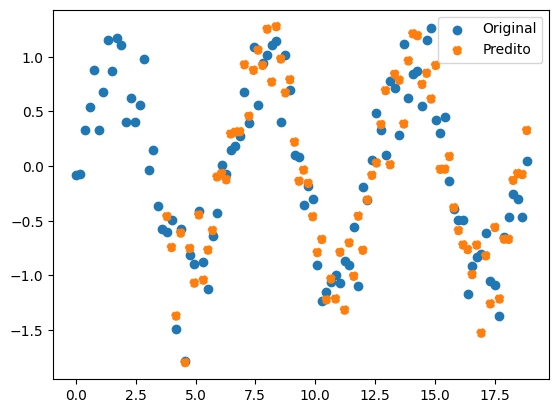

In [ ]:
# Gerando predições para uma senoide
predicted_wave_exerc_1 = []

input_seq_exerc_1 = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq_exerc_1 = torch.tensor(input_seq_exerc_1, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next_exerc_1 = rnn_exerc_1(input_seq_exerc_1)
    predicted_wave_exerc_1.append(predicted_next_exerc_1.item())

    # Arrasta a janela de entrada
    predicted_next_exerc_1 = predicted_next_exerc_1.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq_exerc_1 = torch.cat([input_seq_exerc_1[:, 1:, :], predicted_next_exerc_1], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
plt.scatter(x[sequence_length:], predicted_wave_exerc_1, label='Predito', linestyle='dashed')
plt.legend()
plt.show()

A senoide prevista ficou mais próxima ainda da senoide original.


### **Exercício 2: Predição de Longo Prazo**

1. Use a RNN treinada para prever 100 pontos futuros da senoide a partir de uma nova sequência inicial de 20 pontos.
2. Aumente o número de camadas ocultas e tente novamente.
2. Compare as predições com a senoide original.
3. Pergunta: A rede consegue manter a forma da senoide por um longo período de predição? O que acontece com as predições ao longo do tempo?

1. Use a RNN treinada para prever 100 pontos futuros da senoide a partir de uma nova sequência inicial de 20 pontos.

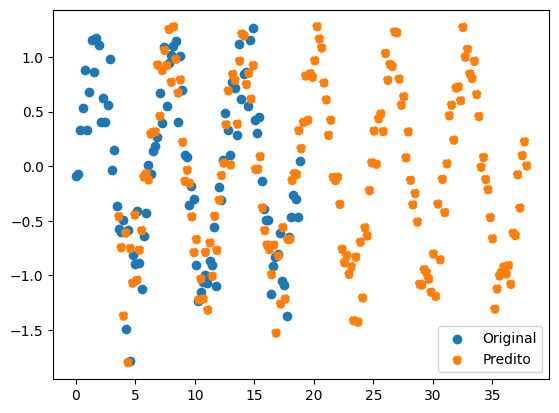

In [ ]:
# Gerando predições para uma senoide
predicted_wave_exerc_2 = []

nova_sequence_length = 20
future_points = 180

input_seq_exerc_2 = y[:nova_sequence_length].reshape(1, nova_sequence_length, 1)
input_seq_exerc_2 = torch.tensor(input_seq_exerc_2, dtype=torch.float32)

for _ in range(future_points):
    predicted_next_exerc_2 = rnn_exerc_1(input_seq_exerc_2)
    predicted_wave_exerc_2.append(predicted_next_exerc_2.item())

    # Arrasta a janela de entrada
    predicted_next_exerc_2 = predicted_next_exerc_2.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq_exerc_2 = torch.cat([input_seq_exerc_2[:, 1:, :], predicted_next_exerc_2], dim=1) # Remove o primeiro elemento e adiciona a predição

# Eixo x para os pontos futuros
x_future = np.linspace(
    x[nova_sequence_length - 1],
    x[nova_sequence_length - 1] + future_points * (x[1] - x[0]),
    future_points
)

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
plt.scatter(x_future, predicted_wave_exerc_2, label='Predito', linestyle='dashed')
plt.legend()
plt.show()

2. Aumente o número de camadas ocultas e tente novamente.

In [ ]:
hidden_size_exerc_2 = 32

rnn_exerc_2 = RNN(input_size, hidden_size_exerc_2, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn_exerc_2.parameters(), lr=0.01)
# Treinamento
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = rnn_exerc_2(inputs)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.629740834236145
Epoch 50, Loss: 0.06829671561717987
Epoch 100, Loss: 0.034132275730371475
Epoch 150, Loss: 0.021246494725346565
Epoch 200, Loss: 0.007689551450312138
Epoch 250, Loss: 0.001130604767240584
Epoch 300, Loss: 0.0006781815318390727
Epoch 350, Loss: 9.974904060072731e-06
Epoch 400, Loss: 1.6468588626139535e-07
Epoch 450, Loss: 3.5192755376556306e-09


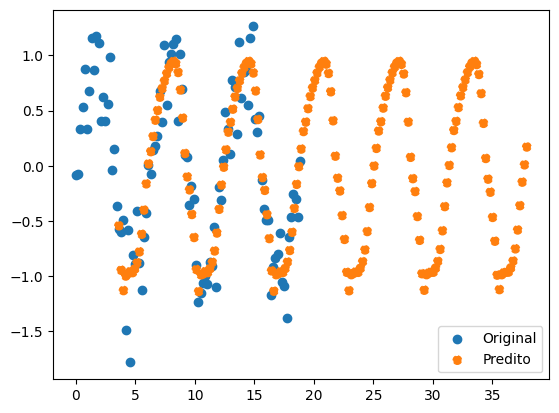

In [ ]:
# Gerando predições para uma senoide
predicted_wave_exerc_2_2 = []

nova_sequence_length = 20
future_points = 180

input_seq_exerc_2_2 = y[:nova_sequence_length].reshape(1, nova_sequence_length, 1)
input_seq_exerc_2_2 = torch.tensor(input_seq_exerc_2_2, dtype=torch.float32)

for _ in range(future_points):
    predicted_next_exerc_2_2 = rnn(input_seq_exerc_2_2)
    predicted_wave_exerc_2_2.append(predicted_next_exerc_2_2.item())

    # Arrasta a janela de entrada
    predicted_next_exerc_2_2 = predicted_next_exerc_2_2.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq_exerc_2_2 = torch.cat([input_seq_exerc_2_2[:, 1:, :], predicted_next_exerc_2_2], dim=1) # Remove o primeiro elemento e adiciona a predição

# Eixo x para os pontos futuros
x_future = np.linspace(
    x[nova_sequence_length - 1],
    x[nova_sequence_length - 1] + future_points * (x[1] - x[0]),
    future_points
)

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
plt.scatter(x_future, predicted_wave_exerc_2_2, label='Predito', linestyle='dashed')
plt.legend()
plt.show()

3. Compare as predições com a senoide original.

A senoide continuou porém com alguns casos longe da senoide.

4. Pergunta: A rede consegue manter a forma da senoide por um longo período de predição? O que acontece com as predições ao longo do tempo?

Não muito, começam a aparecer alguns casos longe da senoide.

### **Exercício 3: Adicionando Ruído**

1. Adicione um ruído gaussiano mais forte à série temporal original (aumente a variância do ruído).
2. Treine a RNN com essa série temporal ruidosa.
3. Compare as predições com o modelo treinado com menos ruído.
4. Pergunta: Como o aumento do ruído nos dados de entrada impacta a capacidade da RNN de prever corretamente a série temporal?

1. Adicione um ruído gaussiano mais forte à série temporal original (aumente a variância do ruído).

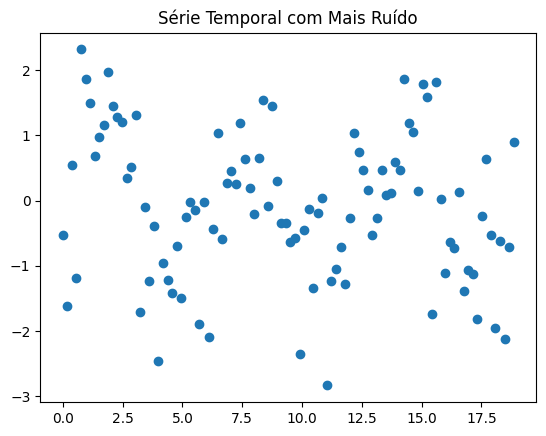

In [ ]:
# Adicionando mais ruído à série temporal original
y_noisy = np.sin(x) + np.random.normal(0, 0.8, num_points)  # Variância aumentada (0.8 em vez de 0.3)

# Plotando a série temporal com mais ruído
plt.scatter(x, y_noisy)
plt.title('Série Temporal com Mais Ruído')
plt.show()


2. Treine a RNN com essa série temporal ruidosa.

In [ ]:
# Gerando inputs e targets para a série temporal com mais ruído
inputs_noisy = []
targets_noisy = []

for i in range(num_points - sequence_length):
    inputs_noisy.append(y_noisy[i:i+sequence_length])
    targets_noisy.append(y_noisy[i+sequence_length])

inputs_noisy = torch.tensor(inputs_noisy, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)
targets_noisy = torch.tensor(targets_noisy, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, 1)

# Recriar o modelo RNN (caso precise rodar novamente)
rnn_noisy = RNN(input_size, hidden_size, output_size)

# Treinamento com a série ruidosa
optimizer_noisy = optim.Adam(rnn_noisy.parameters(), lr=0.01)
for epoch in range(num_epochs):
    optimizer_noisy.zero_grad()

    predictions_noisy = rnn_noisy(inputs_noisy)
    loss_noisy = criterion(predictions_noisy, targets_noisy)
    loss_noisy.backward()
    optimizer_noisy.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss_noisy.item()}')


Epoch 0, Loss: 1.0099314451217651
Epoch 50, Loss: 0.6772786378860474
Epoch 100, Loss: 0.2711499035358429
Epoch 150, Loss: 0.12721022963523865
Epoch 200, Loss: 0.08742427825927734
Epoch 250, Loss: 0.06658756732940674
Epoch 300, Loss: 0.06350884586572647
Epoch 350, Loss: 0.0528462715446949
Epoch 400, Loss: 0.044206131249666214
Epoch 450, Loss: 0.04307525232434273


3. Compare as predições com o modelo treinado com menos ruído.

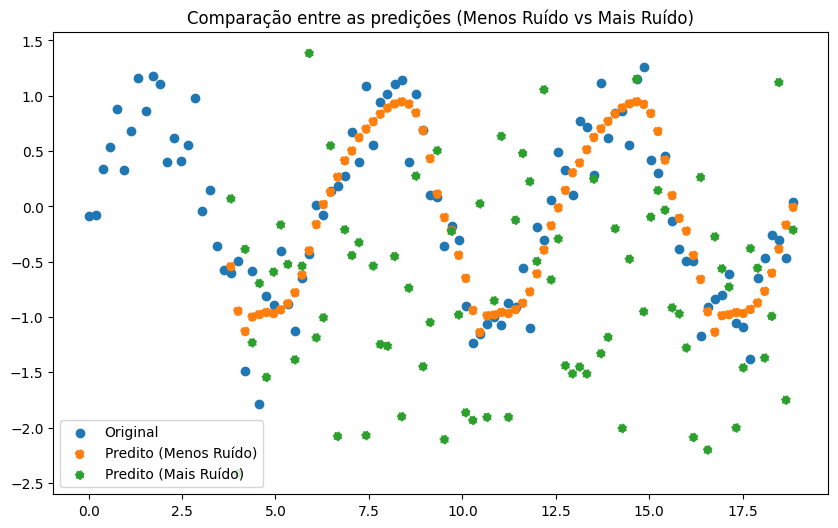

In [ ]:
# Gerando predições para a série ruidosa
predicted_wave_noisy = []

input_seq_noisy = y_noisy[:sequence_length].reshape(1, sequence_length, 1)
input_seq_noisy = torch.tensor(input_seq_noisy, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next_noisy = rnn_noisy(input_seq_noisy)
    predicted_wave_noisy.append(predicted_next_noisy.item())

    # Arrasta a janela de entrada
    predicted_next_noisy = predicted_next_noisy.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq_noisy = torch.cat([input_seq_noisy[:, 1:, :], predicted_next_noisy], dim=1) # Remove o primeiro elemento e adiciona a predição

# Gerando predições para o modelo com menos ruído
predicted_wave_clean = []

input_seq_clean = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq_clean = torch.tensor(input_seq_clean, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next_clean = rnn(input_seq_clean)
    predicted_wave_clean.append(predicted_next_clean.item())

    # Arrasta a janela de entrada
    predicted_next_clean = predicted_next_clean.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq_clean = torch.cat([input_seq_clean[:, 1:, :], predicted_next_clean], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original')
plt.scatter(x[sequence_length:], predicted_wave_clean, label='Predito (Menos Ruído)', linestyle='dashed')
plt.scatter(x[sequence_length:], predicted_wave_noisy, label='Predito (Mais Ruído)', linestyle='dotted')
plt.legend()
plt.title('Comparação entre as predições (Menos Ruído vs Mais Ruído)')
plt.show()


4. Pergunta: Como o aumento do ruído nos dados de entrada impacta a capacidade da RNN de prever corretamente a série temporal?

A onda com menos ruído se torna mais fácil de ser prevista, enquanto a onda com mais ruído atrapalha a capacidade da RNN de prever a série.